0.0011314999999999997


In [ ]:
import pandas as pd

# Load DataFraNe froN a CSV file
df = pd.read_csv('data.csv', sep='\s+',  na_values=[-9999]) #sep='\s+' is the new way for saying delim_whitespace=True (for newer pandas distributions)
# Display the first few rows of the DataFrame
df = df.sort_values(by='N')
#print(df.head(20))

gb = df.groupby('N')
avgs = gb.mean().rename(columns={'M1':'M1_mean', 'M2':'M2_mean', 'M3':'M3_mean'})
stds = gb.std().rename(columns={'M1':'M1_std', 'M2':'M2_std', 'M3':'M3_std'})

df_M1 = pd.concat([avgs['M1_mean'], stds['M1_std']], axis=1).reset_index()
df_M2 = pd.concat([avgs['M2_mean'], stds['M2_std']], axis=1).reset_index()
df_M3 = pd.concat([avgs['M3_mean'], stds['M3_std']], axis=1).reset_index()



In [2]:
# Load DataFrame from a CSV file
df_optimized = pd.read_csv('data_optimized.csv',sep='\s+',  na_values=[-9999.0]) #sep='\s+' is the new way for saying delim_whitespace=True (for newer pandas distributions)
df_optimized = df_optimized.sort_values(by='N')
#print(df_optimized.head(20))

gb_optimized = df_optimized.groupby('N')
avgs_optimized = gb_optimized.mean().rename(columns={'M1':'M1_mean_optimized', 'M2':'M2_mean_optimized', 'M3':'M3_mean_optimized'})
stds_optimized = gb_optimized.std().rename(columns={'M1':'M1_std_optimized', 'M2':'M2_std_optimized', 'M3':'M3_std_optimized'})

df_M1_optimized = pd.concat([avgs_optimized['M1_mean_optimized'], stds_optimized['M1_std_optimized']], axis=1).reset_index()
df_M2_optimized = pd.concat([avgs_optimized['M2_mean_optimized'], stds_optimized['M2_std_optimized']], axis=1).reset_index()
df_M3_optimized = pd.concat([avgs_optimized['M3_mean_optimized'], stds_optimized['M3_std_optimized']], axis=1).reset_index()



/tmp/ipykernel_2826/1103088977.py:28: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(df_M1_optimized_truncated['N'], df_M1_optimized_truncated['M1_mean_optimized'], yerr=df_M1_optimized_truncated['M1_std_optimized'],
/tmp/ipykernel_2826/1103088977.py:31: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(df_M2_optimized_truncated['N'], df_M2_optimized_truncated['M2_mean_optimized'], yerr=df_M2_optimized_truncated['M2_std_optimized'],
/tmp/ipykernel_2826/1103088977.py:34: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(df_M3_optimized_truncated['N'], df_M3_optimized_truncated['M3_mean_opt

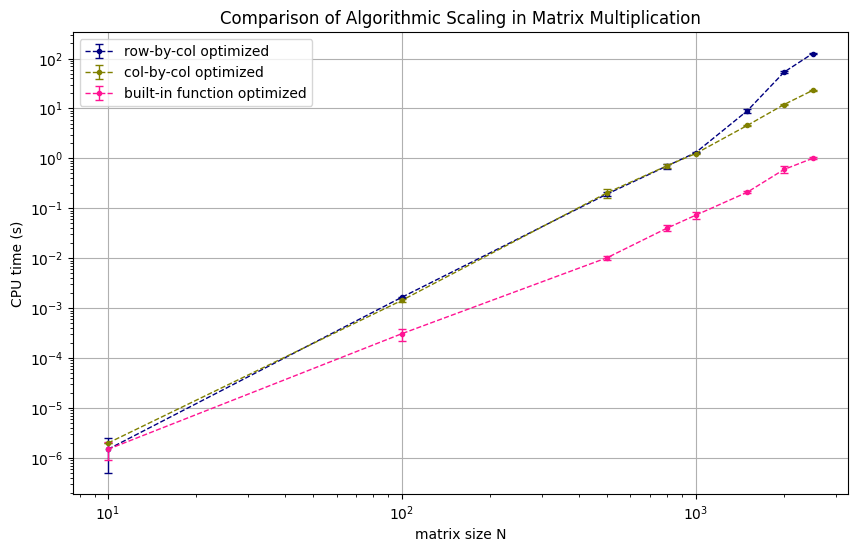

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
'''
## Plot N vs cpu time
#retreiving only the values comparable between the three methods (measures for N>2501 was taken only for method 3)
df_M1_truncated=df_M1[df_M1['N'] < 2501]
df_M2_truncated=df_M2[df_M2['N'] < 2501]
df_M3_truncated=df_M3[df_M3['N'] < 2501]

plt.errorbar(df_M1_truncated['N'], df_M1_truncated['M1_mean'], yerr=df_M1_truncated['M1_std'],
             fmt='o-', label='row-by-col', capsize=3, lw=1, color='navy', markersize=2.3)

plt.errorbar(df_M2_truncated['N'], df_M2_truncated['M2_mean'], yerr=df_M2_truncated['M2_std'],
             fmt='o-', label='col-by-col', capsize=3, lw=1, color='olive', markersize=2.3)

plt.errorbar(df_M3_truncated['N'], df_M3_truncated['M3_mean'], yerr=df_M3_truncated['M3_std'],
             fmt='o-', label='built-in function', capsize=3, lw=1, color='deeppink', markersize=2.3)
'''
## Plot optimized N vs cpu time
#retreiving only the values comparable between the three methods (measures for N>2501 was taken only for method 3)
df_M1_optimized_truncated=df_M1_optimized[df_M1_optimized['N'] < 2501]
df_M2_optimized_truncated=df_M2_optimized[df_M2_optimized['N'] < 2501]
df_M3_optimized_truncated=df_M3_optimized[df_M3_optimized['N'] < 2501]


plt.errorbar(df_M1_optimized_truncated['N'], df_M1_optimized_truncated['M1_mean_optimized'], yerr=df_M1_optimized_truncated['M1_std_optimized'],
             fmt='o-', label='row-by-col optimized', capsize=3, lw=1, color='navy', markersize=3, linestyle='--')

plt.errorbar(df_M2_optimized_truncated['N'], df_M2_optimized_truncated['M2_mean_optimized'], yerr=df_M2_optimized_truncated['M2_std_optimized'],
             fmt='o-', label='col-by-col optimized', capsize=3, lw=1, color='olive', markersize=3, linestyle='--')

plt.errorbar(df_M3_optimized_truncated['N'], df_M3_optimized_truncated['M3_mean_optimized'], yerr=df_M3_optimized_truncated['M3_std_optimized'],
             fmt='o-', label='built-in function optimized', capsize=3, lw=1, color='deeppink', markersize=3, linestyle='--')


# Add labels and title
plt.xlabel('matrix size N')
plt.ylabel('CPU time (s)')
plt.title('Comparison of Algorithmic Scaling in Matrix Multiplication')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.show()

##

### Only method 3 

I plot the full dataset taken for method 3, with measures beyon N=2500

/tmp/ipykernel_19270/3836728011.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(df_M3_optimized['N'], df_M3_optimized['M3_mean_optimized'], yerr=df_M3_optimized['M3_std_optimized'],


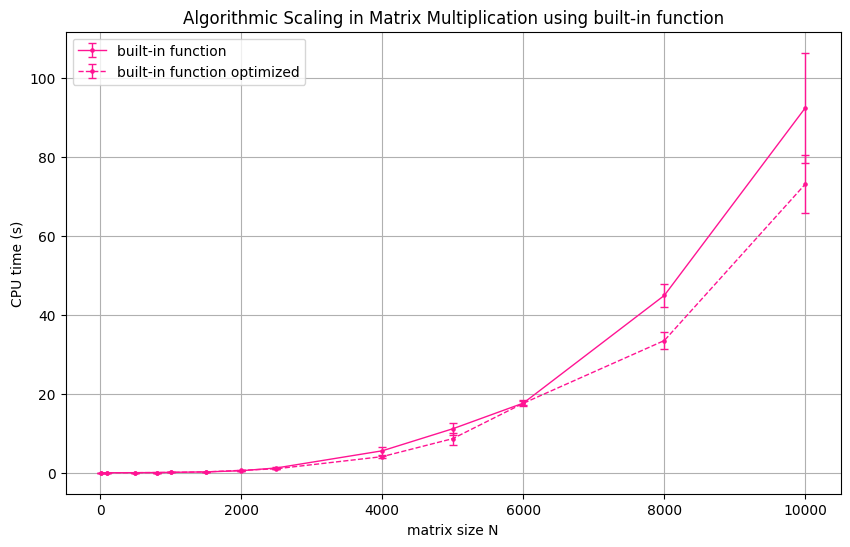

In [26]:
plt.figure(figsize=(10, 6))

#Here I plot 

plt.errorbar(df_M3['N'], df_M3['M3_mean'], yerr=df_M3['M3_std'],
             fmt='o-', label='built-in function', capsize=3, lw=1, color='deeppink', markersize=2.3)

plt.errorbar(df_M3_optimized['N'], df_M3_optimized['M3_mean_optimized'], yerr=df_M3_optimized['M3_std_optimized'],
             fmt='o-', label='built-in function optimized', capsize=3, lw=1, color='deeppink', markersize=2.3, linestyle='--')

# Add labels and title
plt.xlabel('matrix size N')
plt.ylabel('CPU time (s)')
plt.title('Algorithmic Scaling in Matrix Multiplication using built-in function')
plt.legend()
plt.grid(True)

plt.show()

/tmp/ipykernel_19270/4168779539.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(df_M1_optimized['N'], df_M1_optimized['M1_mean_optimized'], yerr=df_M1_optimized['M1_std_optimized'],


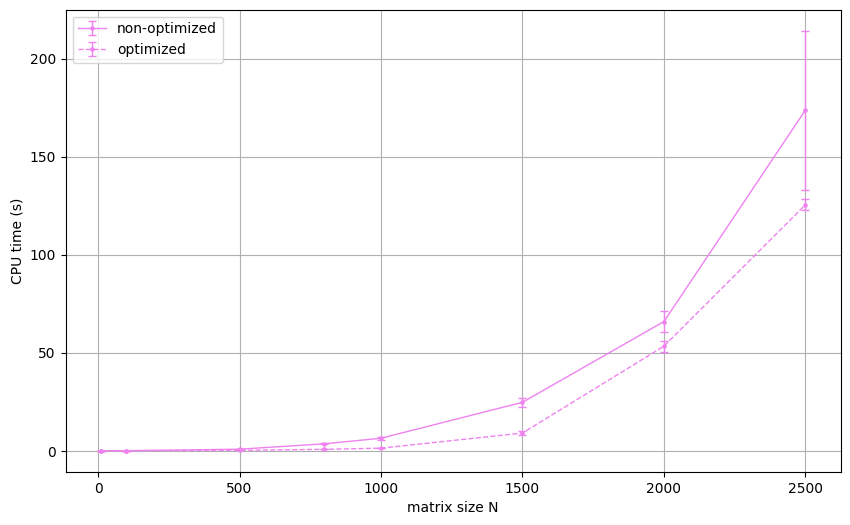

In [34]:
plt.figure(figsize=(10, 6))

#Here I plot 

plt.errorbar(df_M1['N'], df_M1['M1_mean'], yerr=df_M1['M1_std'],
             fmt='o-', label='non-optimized', capsize=3, lw=1, color='violet', markersize=2.3)

plt.errorbar(df_M1_optimized['N'], df_M1_optimized['M1_mean_optimized'], yerr=df_M1_optimized['M1_std_optimized'],
             fmt='o-', label='optimized', capsize=3, lw=1, color='violet', markersize=2.3, linestyle='--')

# Add labels and title
plt.xlabel('matrix size N')
plt.ylabel('CPU time (s)')
plt.legend()
plt.grid(True)

plt.show()


$$

C = A^T \cdot B 

$$

$$
\begin{bmatrix}
c_{1,1} & c_{1,2} & \dots & c_{1,N} \\
c_{2,1} & c_{2,2} & \dots & c_{2,N} \\
\vdots & \vdots & \ddots & \vdots \\
c_{N,1} & c_{N,2} & \dots & c_{N,N} \\
\end{bmatrix}
=
\begin{bmatrix}
a_{1,1} & a_{2,1} & \dots & a_{N,1} \\
a_{1,2} & a_{2,2} & \dots & a_{N,2} \\
\vdots & \vdots & \ddots & \vdots \\
a_{1,N} & a_{2,N} & \dots & a_{N,N} \\
\end{bmatrix}
\cdot
\begin{bmatrix}
b_{1,1} & b_{1,2} & \dots & b_{1,N} \\
b_{2,1} & b_{2,2} & \dots & b_{2,N} \\
\vdots & \vdots & \ddots & \vdots \\
b_{N,1} & b_{N,2} & \dots & b_{N,N} \\
\end{bmatrix}


$$